In [1]:
import numpy as np
import matplotlib.pyplot as plt
import np_info_analysis as na

In [2]:
'''
matlab colors
#DD6734
#0284C0
'''
yellow='#ffb200'
blue='#0284C0'
red='#DD5544'

name='K4'

In [3]:
print('x\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
print('\t'.join([str(i) for i in range(9)]))

x	y	cx	cy	C	std	int	maxint	relBg
0	1	2	3	4	5	6	7	8


In [4]:
# main_folder='C:/Users/jabuk/Documents/jaderka/ufe/results/'
# folder=main_folder+'L3/'

main_folder='C:/SPRUP_data_Jenda/2019_03_13_Jenda_microscopy/'
folder=main_folder+'19_09_10_K4/export_np/'


In [33]:
# NP=100
# nm=[7, 6, 5, 4, 3, 2, 8, 9]
# nm=[6 ,4, 3, 2, 8]

# NP=80
# nm=[16, 15, 14, 12, 13]
NP=60
nm=[22, 21, 20, 19, 18]
NP=40
nm=[27 ,26]



files=[folder+'raw_{:02.0f}_1'.format(f) for f in nm]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]
print('position in dip')
data=[]
data_std=[]
data_stnr=[]
data_stnr_std=[]


print('no\tx\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
for file in files: 
    info=na.readinfo(file)
    
    stnr=[]
    for row in info:
        stnr.append(row[6]/(row[0]*row[1]/2.93**2)/row[8])
    data_stnr.append(np.average(stnr))
    data_stnr_std.append(np.std(stnr))
    
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

    print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
    print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
    print(80*'-')

position in dip
no	x	y	cx	cy	C	std	int	maxint	relBg
27	18.8	6.2	2.50	3.89	2.29	0.00025	0.00464	0.00116	0.00020
n= 10	3.3	1.6	0.66	1.20	0.81	0.00001	0.00236	0.00034	0.00001
--------------------------------------------------------------------------------
26	18.5	7.3	3.39	4.47	2.80	0.00027	0.00861	0.00162	0.00021
n= 10	2.6	2.0	1.01	1.51	0.62	0.00003	0.00408	0.00053	0.00002
--------------------------------------------------------------------------------


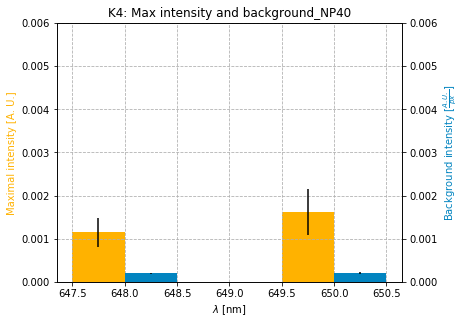

In [35]:
# wls=[640, 644 ,646, 648, 650, 652, 654, 656]
wls=[644, 648, 650, 652, 654]
wls=[648, 650]

data1=[d[7] for d in data]
data1_std=[d[7] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]



w=0.5

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Max intensity and background_NP'+str(NP)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Maximal intensity [A. U.]', color=yellow)
axes.set_ylim([0, 0.006])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.006])

axes.bar([s-w/2 for s in wls], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

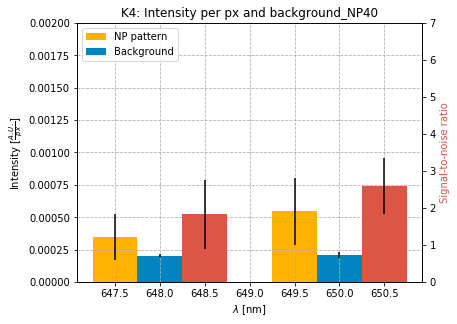

In [36]:
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1]/2.93**2 for d in data]

data3=[data1[i]/area[i] for i in range(len(data1))]
data3_std=[data1_std[i]/area[i] for i in range(len(data1_std))]


w=0.5

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity per px and background_NP'+str(NP)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Intensity [$\\frac{A. U.}{px}$]')
axes.set_ylim([0, 0.002])

axesI = axes.twinx()
axesI.set_ylabel('Signal-to-noise ratio', color=red)
axesI.set_ylim([0, 7])

axes.bar([s-w for s in wls], data3, w, yerr=data3_std, color=yellow, label='NP pattern')
axes.bar([s for s in wls], data2, w, yerr=data2_std, color=blue,label='Background')

axes.legend(loc=2)

axesI.bar([s+w for s in wls], data_stnr, w, yerr=data_stnr_std, color=red,label='y')
# axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

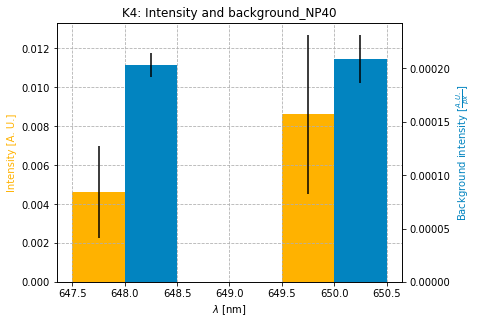

In [37]:
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=0.5

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity and background_NP'+str(NP)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Intensity [A. U.]', color=yellow)
# axes.set_ylim([0, 0.04])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
# axesI.set_ylim([0, 0.0006])

axes.bar([s-w/2 for s in wls], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

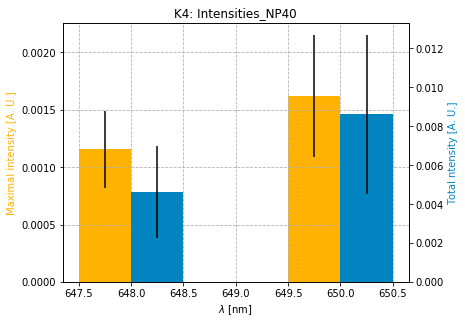

In [38]:
data1=[d[7] for d in data]
data1_std=[d[7] for d in data_std]
data2=[d[6] for d in data]
data2_std=[d[6] for d in data_std]
area=[d[0]*d[1] for d in data]

w=0.5

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensities_NP'+str(NP)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Maximal intensity [A. U.]', color=yellow)

axesI = axes.twinx()
axesI.set_ylabel('Total ntensity [A. U.]', color=blue)

axes.bar([s-w/2 for s in wls], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

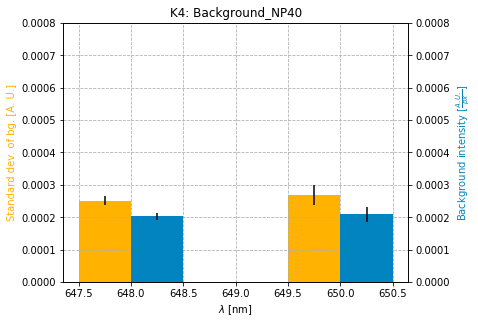

In [39]:
data1=[d[5] for d in data]
data1_std=[d[5] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=0.5

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Background_NP'+str(NP)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Standard dev. of bg. [A. U.]', color=yellow)
axes.set_ylim([0, 0.0008])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.0008])

axes.bar([s-w/2 for s in wls], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

## Noise reduction with time

In [16]:
NP=734
nm=[5, 6, 15, 15] #jeste 30
# np=730
# nm=[3, 8, 13, 21] #jeste 29



files=[folder+'norm_{:02.0f}_1'.format(f) for f in nm]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]

data=[]
data_std=[]


print('no\tx\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
for file in files: 
    info=na.readinfo(file)
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

#     print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
#     print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
#     print(80*'-')

no	x	y	cx	cy	C	std	int	maxint	relBg


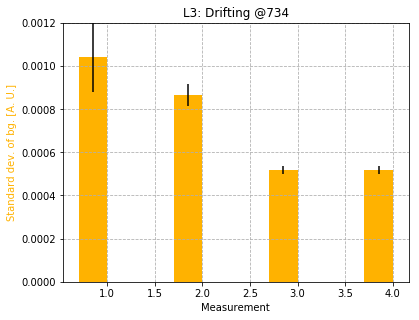

In [17]:
ts=[1, 2, 3, 4]
data1=[d[5] for d in data]
data1_std=[d[5] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=0.3

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Drifting @'+str(NP)
axes.set_title(name+': '+title)
axes.set_xlabel('Measurement')
axes.set_ylabel('Standard dev. of bg. [A. U.]', color=yellow)
axes.set_ylim([0, 0.0012])
# axesI = axes.twinx()
# axesI.set_ylabel('Intensity per one px [A. U.]', color=blue)

axes.bar([s-w/2 for s in ts], data1, w, yerr=data1_std, color=yellow, label='x')

# axesI.bar([s+w/2 for s in ts], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

# Different NP sizes

In [71]:
wl=648
nm=[4, 15, 21, 27]  
# wl=650
# nm=[3, 14, 20, 26] 
# wl=652
# nm=[2,12,19,25] 

files=[folder+'raw_{:02.0f}_1'.format(f) for f in nm]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]
print('position in dip')
data=[]
data_std=[]
data_stnr=[]
data_stnr_std=[]
data_area=[]
data_area_std=[]


print('no\tx\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
for file in files: 
    info=na.readinfo(file)
    
    stnr=[]
    area=[]
    for row in info:
        stnr.append(row[6]/(row[0]*row[1]/2.93**2)/row[8])
        area.append(row[0]*row[1])
        
    data_stnr.append(np.average(stnr))
    data_stnr_std.append(np.std(stnr))
    
    data_area.append(np.average(area))
    data_area_std.append(np.std(area))
    
    
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

    print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
    print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
    print(80*'-')

position in dip
no	x	y	cx	cy	C	std	int	maxint	relBg
04	21.7	11.1	2.77	3.26	2.02	0.00019	0.00574	0.00107	0.00015
n= 10	3.0	4.9	0.44	1.24	0.46	0.00002	0.00136	0.00021	0.00001
--------------------------------------------------------------------------------
15	20.8	6.4	3.51	4.77	2.92	0.00021	0.00648	0.00128	0.00017
n= 10	4.2	1.2	0.62	0.86	0.69	0.00002	0.00154	0.00024	0.00001
--------------------------------------------------------------------------------
21	20.2	8.2	3.62	4.46	2.72	0.00021	0.00734	0.00130	0.00017
n= 10	3.6	1.8	0.93	1.11	0.62	0.00002	0.00244	0.00032	0.00002
--------------------------------------------------------------------------------
27	18.8	6.2	2.50	3.89	2.29	0.00025	0.00464	0.00116	0.00020
n= 10	3.3	1.6	0.66	1.20	0.81	0.00001	0.00236	0.00034	0.00001
--------------------------------------------------------------------------------


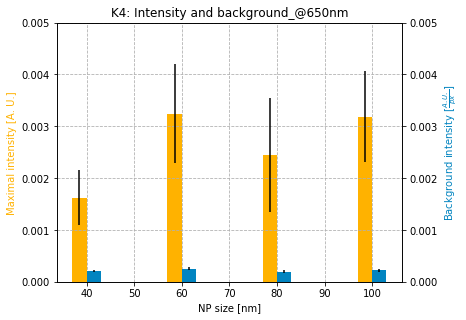

In [60]:
nps=[100, 80, 60, 40]
data1=[d[7] for d in data]
data1_std=[d[7] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=3

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity and background_@'+str(wl)+'nm'
axes.set_title(name+': '+title)
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('Maximal intensity [A. U.]', color=yellow)
axes.set_ylim([0, 0.005])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.005])


axes.bar([s-w/2 for s in nps], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in nps], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

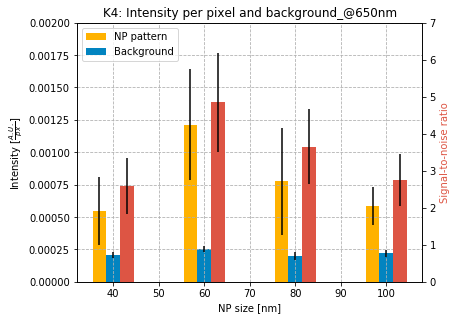

In [61]:
nps=[100, 80, 60, 40]
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1]/2.93**2 for d in data]

w=3

data3=[data1[i]/area[i] for i in range(len(data1))]
data3_std=[data1_std[i]/area[i] for i in range(len(data1_std))]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity per pixel and background_@'+str(wl)+'nm'
axes.set_title(name+': '+title)
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('Intensity [$\\frac{A. U.}{px}$]', color='black')
axes.set_ylim([0, 0.002])

axesI = axes.twinx()
axesI.set_ylabel('Signal-to-noise ratio', color=red)
axesI.set_ylim([0, 7])


axes.bar([s-w for s in nps], data3, w, yerr=data3_std, color=yellow, label='NP pattern')
axes.bar([s for s in nps], data2, w, yerr=data2_std, color=blue,label='Background')

axes.legend(loc=2)

axesI.bar([s+w for s in nps], data_stnr, w, yerr=data_stnr_std, color=red,label='y')

fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

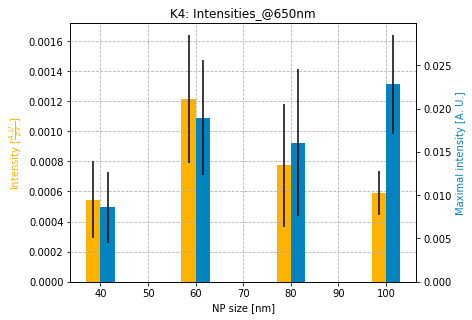

In [62]:
nps=[100, 80, 60, 40]
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[6] for d in data]
data2_std=[d[6] for d in data_std]
area=[d[0]*d[1]/2.93**2 for d in data]

w=3

data3=[data1[i]/area[i] for i in range(len(data1))]
data3_std=[data1_std[i]/area[i] for i in range(len(data1_std))]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensities_@'+str(wl)+'nm'
axes.set_title(name+': '+title)
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('Intensity [$\\frac{A. U.}{px}$]', color=yellow)
# axes.set_ylim([0, 0.12])

axesI = axes.twinx()
axesI.set_ylabel('Maximal intensity [A. U.]', color=blue)
# axesI.set_ylim([0, 0.12])


axes.bar([s-w/2 for s in nps], data3, w, yerr=data3_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in nps], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

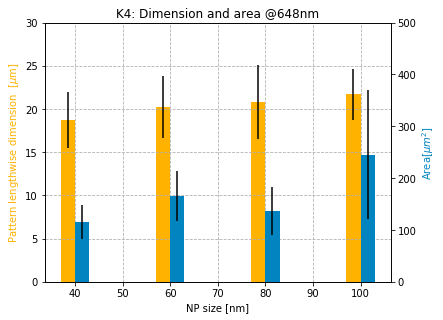

In [72]:
data1=[d[0] for d in data]
data1_std=[d[0] for d in data_std]
data2=[d[4] for d in data]
data2_std=[d[4] for d in data_std]
area=[d[0]*d[1]/2.93**2 for d in data]

w=3

data3=[data1[i]/area[i] for i in range(len(data1))]
data3_std=[data1_std[i]/area[i] for i in range(len(data1_std))]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Dimension and area @'+str(wl)+'nm'
axes.set_title(name+': '+title)
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('Pattern lengthwise dimension  [$\mu$m]',color=yellow)
axes.set_ylim([0, 30])

axesI = axes.twinx()
axesI.set_ylabel('Area[$\mu m^2$]', color=blue)
axesI.set_ylim([0, 500])


axes.bar([s-w/2 for s in nps], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in nps], data_area, w, yerr=data_area_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

# FPS change

In [8]:
fps=[5, 2.5, 1, 0.5]  

# files=[folder+'norm_32_{}fps'.format(f) for f in fps]
files=[folder+'raw_01_5fps',
       folder+'raw_01_25fps',
       folder+'raw_01_1fps',
       folder+'raw_01_05fps',
      
      ]



print('position in dip')
data=[]
data_std=[]


print('no\tx\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
for file in files: 
    info=na.readinfo(file)
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

    print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
    print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
    print(80*'-')

position in dip
no	x	y	cx	cy	C	std	int	maxint	relBg
5f	11.7	8.8	4.89	5.26	3.55	0.00073	0.02398	0.00507	0.00058
n= 10	2.9	0.0	0.87	1.06	0.48	0.00006	0.00749	0.00093	0.00005
--------------------------------------------------------------------------------
5f	12.0	9.1	5.69	6.10	4.23	0.00059	0.02495	0.00493	0.00046
n= 10	2.4	0.9	1.06	1.24	0.84	0.00006	0.00751	0.00101	0.00005
--------------------------------------------------------------------------------
1f	15.5	9.7	6.73	8.04	4.77	0.00041	0.02755	0.00489	0.00032
n= 10	2.6	1.3	1.42	1.41	0.93	0.00004	0.00734	0.00090	0.00003
--------------------------------------------------------------------------------
5f	16.1	9.7	8.06	9.92	5.79	0.00035	0.02902	0.00493	0.00027
n= 10	3.0	2.3	1.94	2.39	1.47	0.00004	0.00633	0.00087	0.00003
--------------------------------------------------------------------------------


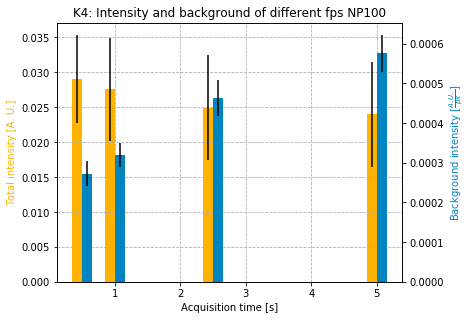

In [16]:
nps=[100, 80, 60]
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]
fps=[1/f for f in fps]
w=0.15

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity and background of different fps NP100'
axes.set_title(name+': '+title)
axes.set_xlabel('Acquisition time [s]')
axes.set_ylabel('Total intensity [A. U.]', color=yellow)
# axes.set_ylim([0, 0.008])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
# axesI.set_ylim([0, 0.008])


axes.bar([s-w/2 for s in fps], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in fps], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')